# Decision Tree
### Modify the Decision Tree scratch code in our lecture such that:
- Modify the scratch code so it can accept an hyperparameter max_depth, in which it will continue create the tree until max_depth is reached.</li>
- Put everything into a class DecisionTree. It should have at least two methods, fit(), and predict()
- Load the iris data and try with your class</li>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class Node:
    def __init__(self, predicted_class):
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None


class DecisionTree:
    def __init__(self, max_depth=None): #create the argument max_depth to specify the tree height
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes_ = len(set(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def predict(self, X):
        return [self._predict(inputs) for inputs in X]

    def _best_split(self, X, y):
        m = y.size
        if m <= 1:
            return None, None
        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]
        best_gini = 1.0 - sum((n / m) ** 2 for n in num_parent)
        best_idx, best_thr = None, None
        for idx in range(self.n_features_):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()
            for i in range(1, m):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum(
                    (num_left[x] / i) ** 2 for x in range(self.n_classes_)
                )
                gini_right = 1.0 - sum(
                    (num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_)
                )
                gini = (i * gini_left + (m - i) * gini_right) / m
                if thresholds[i] == thresholds[i - 1]:
                    continue
                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2
        return best_idx, best_thr

    def _grow_tree(self, X, y, depth=0): #default tree height begins with 0
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(predicted_class=predicted_class)
        if depth < self.max_depth:
            idx, thr = self._best_split(X, y)
            # print(idx, thr)
            if idx is not None:
                indices_left = X[:, idx] < thr #all the indexes on the left side of threshold
                # print(indices_left)
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left] # the other way 
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def _predict(self, inputs):
        node = self.tree_
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right

        return node.predicted_class

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
dataset = load_iris()
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size =0.3, random_state = 10)

In [4]:
accuracy_record = []

for height in range(10):

  model = DecisionTree(max_depth=height)
  model.fit(X_train, y_train)
  train_yhat = model.predict(X_train)
  test_yhat = model.predict(X_test)
  train_accuracy = np.sum(model.predict(X_train) == y_train) / len(y_train)
  test_accuracy = np.sum(model.predict(X_test) == y_test) / len(y_test)
  accuracy_record.append(test_accuracy)
  print(f"For the height of {model.max_depth}, the accuracy on trainin set: {train_accuracy}, and test set: {test_accuracy} ")

  print(classification_report(y_true = y_test, y_pred = test_yhat))
  print()


print(f"The best tree height yielding the highest accuracy on test set is {np.argmax(np.array(accuracy_record))}")

For the height of 0, the accuracy on trainin set: 0.34285714285714286, and test set: 0.3111111111111111 
              precision    recall  f1-score   support

           0       0.31      1.00      0.47        14
           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00        14

    accuracy                           0.31        45
   macro avg       0.10      0.33      0.16        45
weighted avg       0.10      0.31      0.15        45


For the height of 1, the accuracy on trainin set: 0.6857142857142857, and test set: 0.6222222222222222 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.00      0.00      0.00        17
           2       0.45      1.00      0.62        14

    accuracy                           0.62        45
   macro avg       0.48      0.67      0.54        45
weighted avg       0.45      0.62      0.50        45


For the height of 2, the ac

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The best tree height yielding the highest accuracy on test set is 1


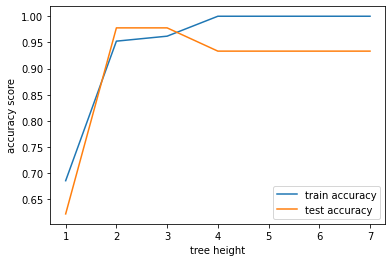

In [5]:
accuracy_record = []
train_accuracy_record = []
test_accuracy_record = []
tree_height = range(1,8)

for height in tree_height:

  model = DecisionTree(max_depth=height)
  model.fit(X_train, y_train)
  train_yhat = model.predict(X_train)
  test_yhat = model.predict(X_test)
  train_accuracy = np.sum(model.predict(X_train) == y_train) / len(y_train)
  test_accuracy = np.sum(model.predict(X_test) == y_test) / len(y_test)
  accuracy_record.append(test_accuracy)
  train_accuracy_record.append(train_accuracy)
  test_accuracy_record.append(test_accuracy)


plt.plot(tree_height, train_accuracy_record, label = 'train accuracy')
plt.plot(tree_height, test_accuracy_record, label = 'test accuracy')
plt.xlabel('tree height')
plt.ylabel('accuracy score')
plt.legend()


print(f"The best tree height yielding the highest accuracy on test set is {np.argmax(np.array(accuracy_record))}")

### Summary
- We can see that for iris data set the best tree height is at 2, giving the highest accuracy rate on test set at around ~98%
- As the iris data contains only 4 features, the model can reach the best leaves quite faster because of a few number of splitting times
- It should be noted that after increasing the tree height to 4 and onwards, the model starts to overfit the data as it gets the 100% accuracy on training set